# Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

In [2]:
def layer_sizes(X, Y):
    '''
    输入：
    X：训练输入
    Y：训练输出
    输出：
    n_x:输入层大小
    n_h:隐藏层大小
    n_y:输出层大小
    '''
    n_x = X.shape[0] # 输入层大小
    n_h = 4 # 隐藏层大小，手动指定。
    n_y = Y.shape[0] # 输出层大小
    return (n_x, n_h, n_y)

In [3]:
def initialize_parameters(n_x, n_h, n_y):
    '''
    输入：
    n_x:输入层神经元个数
    n_h:隐藏层神经元个数
    n_y:输出层神经元个数
    输出：
    parameters：初始化后的模型参数
    '''
    #权重系数随机初始化
    W1 = np.random.randn(n_h, n_x)*0.01
    #偏置参数以零为初始化值
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1)) 
   #错误判断 当assert中条件不满足则终止程序
    assert (W1.shape == (n_h, n_x))    
    assert (b1.shape == (n_h, 1))    
    assert (W2.shape == (n_y, n_h))    
    assert (b2.shape == (n_y, 1))

    #封装为字典
    parameters = {"W1": W1, 
                  "b1": b1,                 
                  "W2": W2,                  
                  "b2": b2}   
                   
    return parameters

In [4]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [5]:
#定义前向传播过程
def forward_propagation(X, parameters):
    '''
    输入：
    X：训练输入
    parameters：初始化的模型参数
    输出：
    A2:模型输出
    caches：前向传播过程计算的中间值缓存
    '''
    # 获取各参数初始值
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    # 执行前向计算
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)    
    assert(A2.shape == (1, X.shape[1]))

    #将中间结果封装为字典
    cache = {"Z1": Z1,                   
             "A1": A1,                   
             "Z2": Z2,                  
             "A2": A2}    

    return A2, cache

In [6]:
#定义损失函数
def compute_cost(A2, Y,parameters):
    '''
    输入：
    A2：向前计算输出
    Y：训练标签
    输出：
    cost：当前平均损失
    '''
    # 训练样本量
    m = Y.shape[1] 
    # 计算交叉熵损失
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = -1/m * np.sum(logprobs)
    # 维度压缩
    cost = np.squeeze(cost)     

    assert(isinstance(cost, float))    
    return cost

In [7]:
#定义反向传播过程
def backward_propagation(parameters, cache, X, Y):
    '''
    输入：
    parameters：神经网络参数字典
    cache：神将网络前向计算中间缓存字典
    X：训练输入
    Y：训练输出
    输出：
    grads：权重梯度字典
    '''
    #样本量
    m = X.shape[1]    
    # 获取W1和W2
    W1 = parameters['W1']
    W2 = parameters['W2']    
    # 获取A1和A2
    A1 = cache['A1']
    A2 = cache['A2']    
    # 执行反向传播
    dZ2 = A2-Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,                      
             "dW2": dW2,             
             "db2": db2}   
    return grads

In [8]:
#权重的更新
def update_parameters(parameters, grads, learning_rate=1.2):
    '''
    输入：
    parameters：神经网络参数字典
    grads：权重梯度字典
    learning_rate：学习率
    输出：
    parameters：更新后的权重字典
    '''
    # 获取参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    # 获取梯度
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']    
    # 参数更新
    W1 -= dW1 * learning_rate
    b1 -= db1 * learning_rate
    W2 -= dW2 * learning_rate
    b2 -= db2 * learning_rate

    parameters = {"W1": W1, 
                  "b1": b1,            
                  "W2": W2,   
                  "b2": b2}    
    return parameters

In [9]:
#神经网络模型封装
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    '''
    输入：
    X：训练输入
    Y：训练输出
    n_h：隐藏层节点数
    num_interations：迭代次数
    print_cost：训练过程中是否打印损失
    输出：
    parameters：神经网络训练优化后的权重
    '''
    #生成随机种子
    np.random.seed(3)
    #输入和输出节点数#layersize：已经定义的网络结构
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]    
    # 初始化模型参数
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    # 梯度下降和参数更新循环
    for i in range(0, num_iterations):        
    # 前向传播计算
        A2, cache = forward_propagation(X, parameters)        
        # 计算当前损失
        cost = compute_cost(A2, Y, parameters)        
        # 反向传播
        grads = backward_propagation(parameters, cache, X, Y)        
        # 参数更新
        parameters = update_parameters(parameters, grads, learning_rate=1.2)        
        # 打印损失
        if print_cost and i % 1000 == 0:            
            print ("Cost after iteration %i: %f" %(i, cost))    
            
    return parameters

In [10]:
#基于正弦函数生成一组非线性可分数据集
def create_dataset():
    np.random.seed(1)
    m = 400 # 数据量
    N = int(m/2) # 每个标签的实例数
    D = 2 # 数据维度
    X = np.zeros((m,D)) # 数据矩阵
    Y = np.zeros((m,1), dtype='uint8') # 标签维度
    a = 4 
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

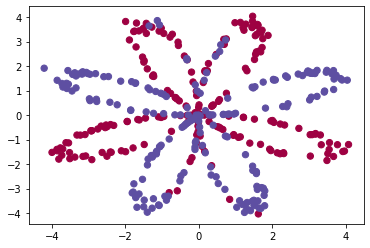

In [11]:
X, Y = create_dataset()
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

In [13]:
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220612
Cost after iteration 8000: 0.219411
Cost after iteration 9000: 0.218526


In [12]:
def predict(parameters, X): 
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
    return predictions

In [14]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + 
      np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


In [16]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 10 hidden units: 91.0 %
Accuracy for 20 hidden units: 90.75 %


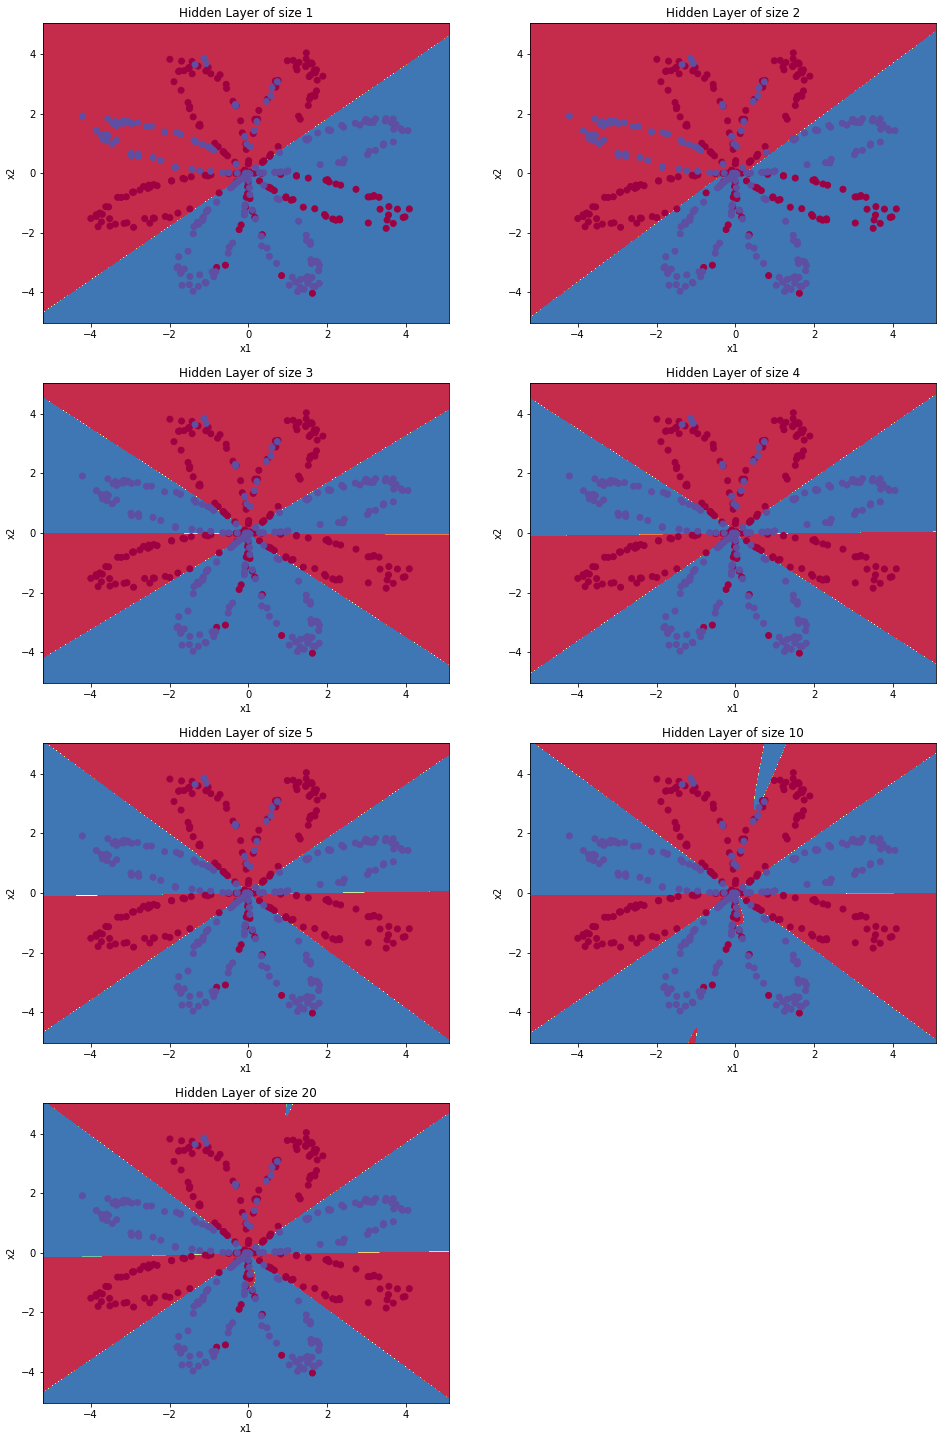

In [17]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [18]:
print(X.shape, Y.shape)

(2, 400) (1, 400)


In [19]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(4), random_state=1)
clf.fit(X.T, Y.T)

/Users/heshuaichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/heshuaichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=4, random_state=1, solver='sgd')

In [20]:
Y.T[0]

array([0], dtype=uint8)

In [21]:
clf.predict(X.T[:5])

array([0, 1, 1, 1, 0], dtype=uint8)